In [2]:
import pandas as pd
from sqlalchemy import create_engine
from sqlalchemy.pool import NullPool
import matplotlib as plt
import matplotlib.pylab as plt
import seaborn as sns
from tqdm import tqdm
from PIL import Image
import requests
from io import BytesIO
import pickle



In [3]:
with open('cache.pickle', 'rb') as handle:
    cache = pickle.load(handle)

In [5]:
ad = cache['ad']
no_ad = cache['no_ad']
up = cache['up']

ad_ref_term = cache['ad_ref_term']
no_ad_ref_term = cache['no_ad_ref_term']
up_ref_term = cache['up_ref_term']

In [90]:
import numpy as np

rank = np.array(range(1, len(ad_ref_term)+1))
ad_ref_term = ad_ref_term.sort_values('imp_cnt', ascending=False)
ad_ref_term['rank'] = rank

Text(0, 0.5, 'impression count')

/Users/emilyPark/.pyenv/versions/bun-analytics/lib/python3.7/site-packages/IPython/core/events.py:74: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/Users/emilyPark/.pyenv/versions/bun-analytics/lib/python3.7/site-packages/IPython/core/pylabtools.py:125: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


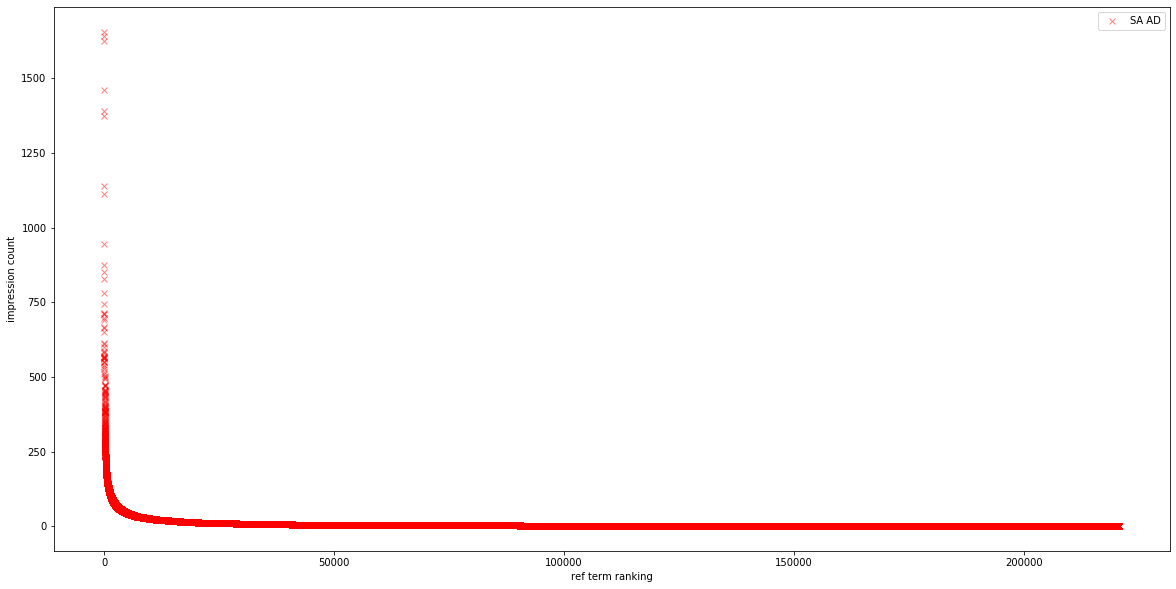

In [91]:
plt.figure(figsize=(20,10))

plt.plot(ad_ref_term['rank'], ad_ref_term['imp_cnt'], 'x', color = 'red', alpha = 0.5, label = 'SA AD')
plt.legend()

plt.xlabel('ref term ranking')
plt.ylabel('impression count')

In [80]:
l = ad_ref_term['content_id'].tolist()

In [85]:
imp_df['ref_term'].nunique()

177422

In [81]:
imp_df[imp_df['content_id'].isin(l)].groupby(['content_id', 'category'], as_index=False)['imp_id'].count().drop('imp_id', axis=1).groupby('category',as_index=False)['content_id'].count().sort_values('content_id', ascending=False)

,category,content_id
7,400,3570
10,600,2250
6,320,1689
12,750,875
5,310,725
13,800,365
11,700,260
14,900,251
8,410,133
9,500,119


In [92]:
rank = np.array(range(1, len(up_ref_term)+1))
up_ref_term = up_ref_term.sort_values('imp_cnt', ascending=False)
up_ref_term['rank'] = rank

Text(0, 0.5, 'impression count')

/Users/emilyPark/.pyenv/versions/bun-analytics/lib/python3.7/site-packages/IPython/core/events.py:74: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/Users/emilyPark/.pyenv/versions/bun-analytics/lib/python3.7/site-packages/IPython/core/pylabtools.py:125: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


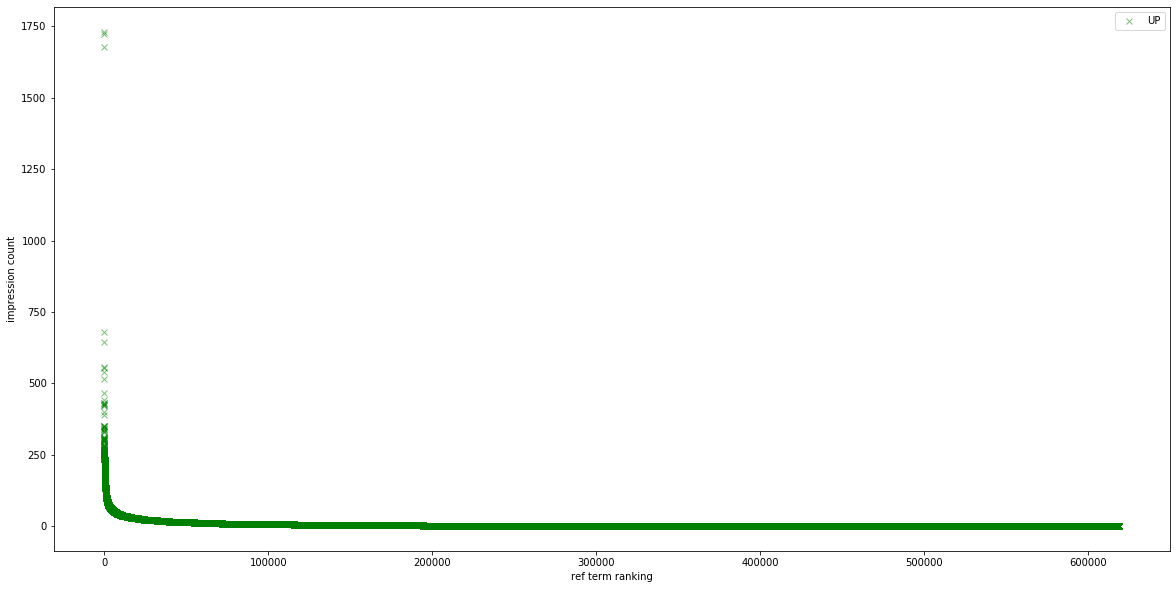

In [93]:
plt.figure(figsize=(20,10))

plt.plot(up_ref_term['rank'], up_ref_term['imp_cnt'], 'x', color = 'green', alpha = 0.5, label = 'UP')
plt.legend()

plt.xlabel('ref term ranking')
plt.ylabel('impression count')

In [62]:
l = up_ref_term[(up_ref_term['rank'] >= 100) & (up_ref_term['imp_cnt'] > 100)]['content_id'].tolist()

In [64]:
imp_df[imp_df['content_id'].isin(l)].groupby(['content_id', 'ref_term'])['imp_id'].count().reset_index().sort_values('imp_id', ascending=False)

,content_id,ref_term,imp_id
3502,135090895,mtb자전거,468
6019,135316570,노트9,442
4286,135181978,mtb자전거,424
2766,134926317,가스건,389
5028,135271315,리본돌,352
6059,135317919,리본돌,350
3618,135101380,갤럭시탭s6 라이트,349
3858,135131286,자전거,340
4469,135205384,오토바이,339
2174,134824743,자전거,314


In [60]:
imp_df[imp_df['content_id'].isin(l)].groupby(['content_id', 'category'], as_index=False)['imp_id'].count().drop('imp_id', axis=1).groupby('category',as_index=False)['content_id'].count().sort_values('content_id', ascending=False)

,category,content_id
5,310,7878
7,400,7103
6,320,6354
10,600,2793
14,900,1921
15,910,1587
11,700,982
9,500,640
13,800,343
8,410,270


In [53]:
l = up_ref_term[(up_ref_term['rank'] >= 100) & (up_ref_term['imp_cnt'] >= 100)]['content_id'].tolist()

In [38]:
imp_df = pd.read_csv('imp_df_2.csv')

/Users/emilyPark/.pyenv/versions/bun-analytics/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [54]:
imp_df[imp_df['content_id'].isin(l)].groupby(['content_id', 'category'], as_index=False)['imp_id'].count().drop('imp_id', axis=1).groupby('category',as_index=False)['content_id'].count().sort_values('content_id', ascending=False)

,category,content_id
6,600,122
7,700,97
8,750,92
10,900,78
1,310,38
2,320,37
11,910,26
3,400,19
12,999,15
9,800,12


In [51]:
a = up_ref_term['content_id'].unique()
b = imp_df[imp_df['content_id'].isin(a)].groupby(['content_id', 'category'], as_index=False)['imp_id'].count().drop('imp_id', axis=1)

In [52]:
b.groupby('category', as_index=False)['content_id'].count().sort_values('content_id', ascending=False)

,category,content_id
6,310,21438
8,400,17981
7,320,14632
11,600,8349
15,900,7280
16,910,3962
14,800,3928
9,410,3876
12,700,3271
10,500,2362


In [94]:
rank = np.array(range(1, len(no_ad_ref_term)+1))
no_ad_ref_term = no_ad_ref_term.sort_values('imp_cnt', ascending=False)
no_ad_ref_term['rank'] = rank

Text(0, 0.5, 'impression count')

/Users/emilyPark/.pyenv/versions/bun-analytics/lib/python3.7/site-packages/IPython/core/events.py:74: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/Users/emilyPark/.pyenv/versions/bun-analytics/lib/python3.7/site-packages/IPython/core/pylabtools.py:125: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


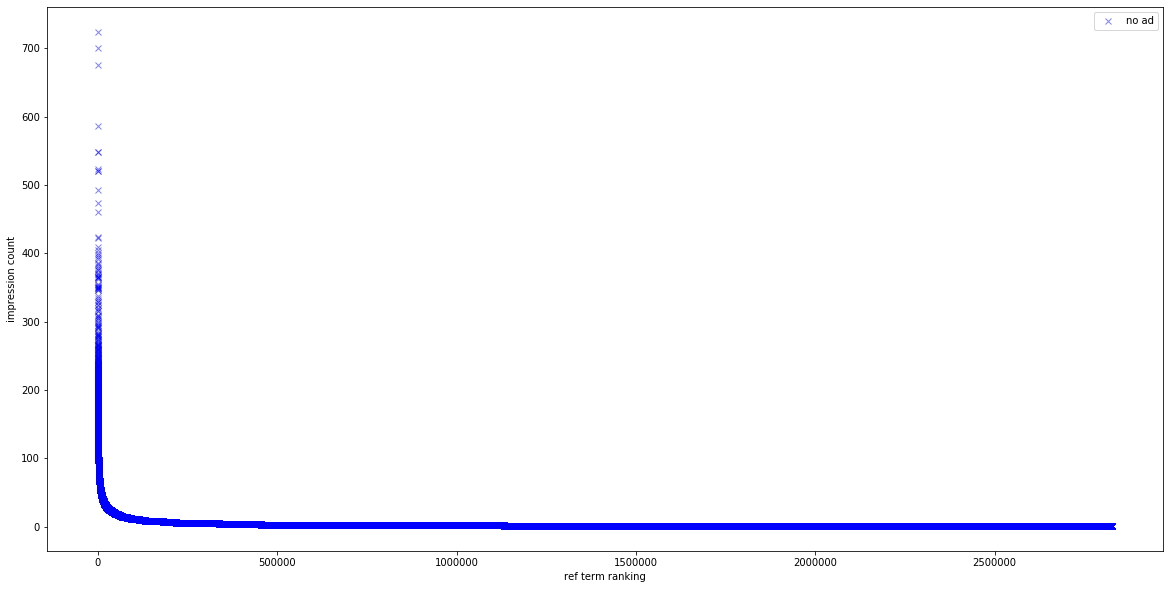

In [95]:
plt.figure(figsize=(20,10))

# plt.plot(ad_ref_term['rank'], ad_ref_term['imp_cnt'], 'x', color = 'red', alpha = 0.5, label = 'ad')
plt.plot(no_ad_ref_term['rank'], no_ad_ref_term['imp_cnt'], 'x', color = 'blue', alpha = 0.5, label = 'no ad')
# plt.plot(up_ref_term['rank'], up_ref_term['imp_cnt'], 'x', color = 'green', alpha = 0.5, label = 'up')
plt.legend()

plt.xlabel('ref term ranking')
plt.ylabel('impression count')

In [82]:
l = no_ad_ref_term['content_id'].tolist()
imp_df[imp_df['content_id'].isin(l)].groupby(['content_id', 'category'], as_index=False)['imp_id'].count().drop('imp_id', axis=1).groupby('category',as_index=False)['content_id'].count().sort_values('content_id', ascending=False)

,category,content_id
9,400,201750
7,310,184441
8,320,139023
12,600,63235
16,900,52963
13,700,44261
15,800,41856
11,500,35128
10,410,28104
14,750,21677


In [66]:
l = no_ad_ref_term[(no_ad_ref_term['rank'] >= 100) & (no_ad_ref_term['imp_cnt'] > 100)]['content_id'].tolist()

In [67]:
imp_df[imp_df['content_id'].isin(l)].groupby(['content_id', 'category'], as_index=False)['imp_id'].count().drop('imp_id', axis=1).groupby('category',as_index=False)['content_id'].count().sort_values('content_id', ascending=False)

,category,content_id
9,700,200
8,600,197
10,750,148
12,900,116
5,400,59
4,320,48
13,910,40
14,999,33
3,310,31
11,800,23


In [83]:
l = no_ad_ref_term[(no_ad_ref_term['rank'] < 100)]['content_id'].tolist()

In [84]:
imp_df[imp_df['content_id'].isin(l)].groupby(['content_id', 'category'], as_index=False)['imp_id'].count().drop('imp_id', axis=1).groupby('category',as_index=False)['content_id'].count().sort_values('content_id', ascending=False)

,category,content_id
8,320,20979
9,400,20118
7,310,18136
12,600,7063
13,700,6875
16,900,3608
11,500,3584
14,750,2798
17,910,2051
15,800,1208


In [ ]:
imp_df[imp_df['content_id'].isin(l)].groupby(['content_id', 'ref_term'])['imp_id'].count().reset_index().sort_values('imp_id', ascending=False)

In [70]:
ad.groupby('content_id')['imp_id'].size().reset_index()['imp_id'].describe()

count    10396.000000
mean       136.357926
std        226.282084
min          1.000000
25%         33.000000
50%         75.000000
75%        152.000000
max       5788.000000
Name: imp_id, dtype: float64

In [73]:
up.groupby('content_id')['imp_id'].size().reset_index()['imp_id'].describe()

count    90736.000000
mean        36.238505
std         51.795612
min          1.000000
25%          8.000000
50%         20.000000
75%         45.000000
max       2238.000000
Name: imp_id, dtype: float64

In [72]:
no_ad.groupby('content_id')['imp_id'].size().reset_index()['imp_id'].describe()

count    845989.000000
mean          9.512319
std          22.549685
min           1.000000
25%           2.000000
50%           3.000000
75%           9.000000
max        1946.000000
Name: imp_id, dtype: float64

In [23]:
no_ad_ref_term[no_ad_ref_term['rank'] <= 100]['imp_cnt'].describe()

count    100915.000000
mean          7.399574
std          19.725980
min           1.000000
25%           1.000000
50%           2.000000
75%           5.000000
max         724.000000
Name: imp_cnt, dtype: float64

In [24]:
up_ref_term[up_ref_term['rank'] <= 100]['imp_cnt'].describe()

count    41166.000000
mean        15.741291
std         31.402417
min          1.000000
25%          2.000000
50%          7.000000
75%         18.000000
max       1730.000000
Name: imp_cnt, dtype: float64

Text(0, 0.5, 'impression count')

/Users/emilyPark/.pyenv/versions/bun-analytics/lib/python3.7/site-packages/IPython/core/events.py:74: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/Users/emilyPark/.pyenv/versions/bun-analytics/lib/python3.7/site-packages/IPython/core/pylabtools.py:125: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


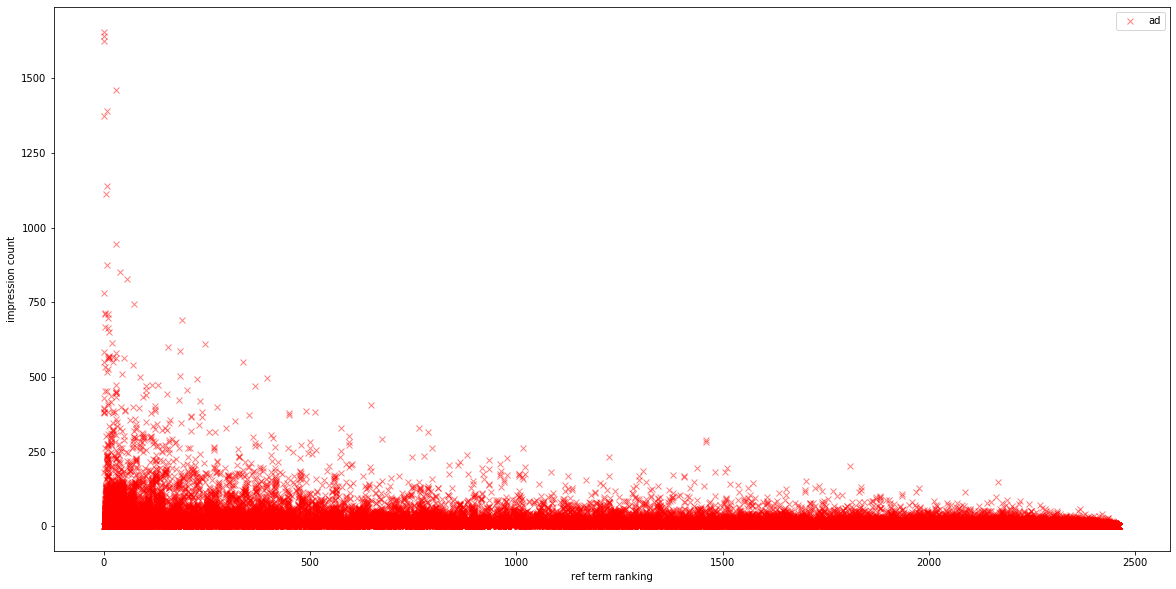

In [18]:
plt.figure(figsize=(20,10))

plt.plot(ad_ref_term['rank'], ad_ref_term['imp_cnt'], 'x', color = 'red', alpha = 0.5, label = 'ad')
# plt.plot(no_ad_ref_term['rank'], no_ad_ref_term['imp_cnt'], 'x', color = 'blue', alpha = 0.5, label = 'no ad')
# plt.plot(up_ref_term['rank'], up_ref_term['imp_cnt'], 'x', color = 'green', alpha = 0.5, label = 'up')
plt.legend()

plt.xlabel('ref term ranking')
plt.ylabel('impression count')